In [1]:
import restructure_data
import feature_engineer

In [2]:
data = restructure_data.DataRestructuring(df_train_path=r'D:\Github\07_E_SUN_2021_Winter_AI\data\tbrain_cc_training_48tags_hash_final.csv',
                                          df_test_path=r'D:\Github\07_E_SUN_2021_Winter_AI\data\需預測的顧客名單及提交檔案範例.csv',
                    start_index=0,
                    number=10000)
data.execute()


2022-01-02 16:32:04,493-INFO-Start reading test data.
2022-01-02 16:32:05,035-INFO-Test data shape: (10000, 4)
2022-01-02 16:32:05,036-INFO-Finish reading test data.
2022-01-02 16:32:05,037-INFO-Start reading train data.


Iteration is stopped.
Memory usage of dataframe is 174.56 MB


2022-01-02 16:34:55,822-INFO-Finish reading train data.
2022-01-02 16:34:55,850-INFO-Start creating training matrix.


Memory usage after optimization is: 56.09 MB
Decreased by 67.9%
Memory usage of dataframe is 1164.55 MB
Memory usage after optimization is: 487.06 MB
Decreased by 58.2%


2022-01-02 16:35:37,112-INFO-Finish creating training matrix.


In [35]:
# import importlib
# importlib.reload(feature_engineer)

<module 'feature_engineer' from 'c:\\Users\\RT009223\\Github\\Projects\\SideProject\\07_E_SUN_2021_Winter_AI\\feature_engineer.py'>

2022-01-02 15:41:28,663-INFO-Start month feature engineering.
2022-01-02 15:41:29,008-INFO-Finish month feature engineering.
2022-01-02 15:41:29,008-INFO-Start shop tagging engineering.
2022-01-02 15:41:40,844-INFO-Finish shop tagging engineering.
2022-01-02 15:41:40,844-INFO-Start clustering feature engineering.
2022-01-02 15:41:45,122-INFO-Finish clustering feature engineering.
2022-01-02 15:41:45,122-INFO-Start percentage changing feature engineering.


Adding feature shop_tag_txn_amt_mean_delta_1_lag_1
Adding feature shop_tag_txn_amt_mean_delta_1_lag_12
Adding feature chid_txn_amt_mean_delta_1_lag_1
Adding feature chid_txn_amt_mean_delta_1_lag_12
Adding feature educd_txn_amt_mean_delta_1_lag_1
Adding feature trdtp_txn_amt_mean_delta_1_lag_1
Adding feature gender_code_txn_amt_mean_delta_1_lag_1
Adding feature age_txn_amt_mean_delta_1_lag_1


2022-01-02 15:42:55,202-INFO-Finish percentage changing feature engineering.
2022-01-02 15:42:55,207-INFO-Start rolling feature engineering.


Creating feature "chid_shop_tag_txn_amt_mean_rolling_mean_win_12"
Creating feature "chid_shop_tag_txn_amt_mean_expanding_mean"
Creating feature "chid_shop_tag_txn_amt_mean_ewm_hl_1"
Creating feature "age_shop_tag_txn_amt_mean_rolling_mean_win_12"
Creating feature "age_shop_tag_txn_amt_mean_expanding_mean"
Creating feature "age_shop_tag_txn_amt_mean_ewm_hl_1"
Creating feature "age_gender_code_shop_tag_txn_amt_mean_rolling_mean_win_12"
Creating feature "age_gender_code_shop_tag_txn_amt_mean_expanding_mean"
Creating feature "age_gender_code_shop_tag_txn_amt_mean_ewm_hl_1"


2022-01-02 15:46:13,642-INFO-Finish rolling feature engineering.
2022-01-02 15:46:13,642-INFO-Start ME feature engineering.


Adding feature shop_tag_txn_amt_mean_lag_1
Adding feature shop_tag_cluster_txn_amt_mean_lag_1
Adding feature trdtp_txn_amt_mean_lag_1
Adding feature trdtp_cluster_txn_amt_mean_lag_1
Adding feature chid_txn_amt_mean_lag_1
Adding feature educd_txn_amt_mean_lag_1
Adding feature poscd_txn_amt_mean_lag_1
Adding feature masts_gender_code_age_txn_amt_mean_lag_1


2022-01-02 15:46:45,006-INFO-Finish ME feature engineering.


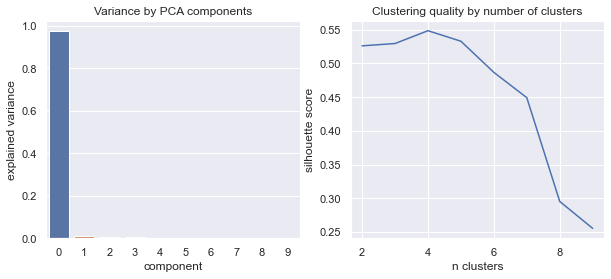

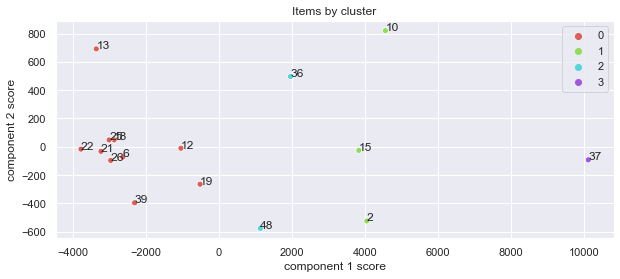

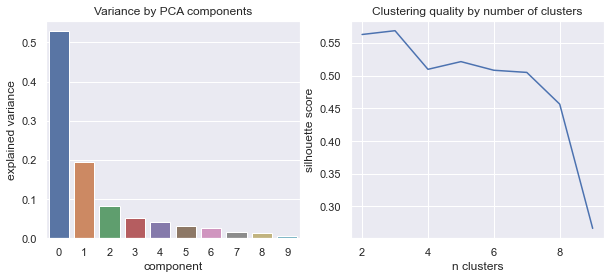

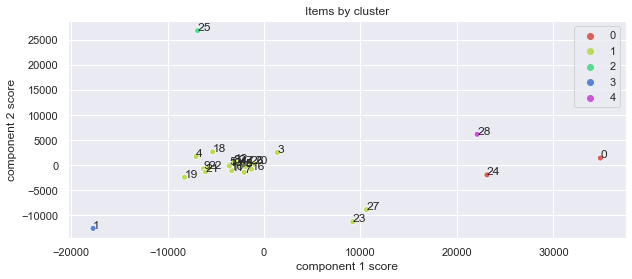

In [4]:
fe = feature_engineer.FeatureEngineering(matrix=data.matrix)
fe.execute()

In [6]:
matrix = fe.matrix.copy()

In [7]:
del fe, data

In [9]:
matrix.columns

Index(['dt', 'chid', 'shop_tag', 'txn_cnt', 'txn_amt', 'domestic_offline_cnt',
       'domestic_online_cnt', 'overseas_offline_cnt', 'overseas_online_cnt',
       'domestic_offline_amt_pct', 'domestic_online_amt_pct',
       'overseas_offline_amt_pct', 'overseas_online_amt_pct', 'card_1_txn_cnt',
       'card_2_txn_cnt', 'card_3_txn_cnt', 'card_4_txn_cnt', 'card_5_txn_cnt',
       'card_6_txn_cnt', 'card_7_txn_cnt', 'card_8_txn_cnt', 'card_9_txn_cnt',
       'card_10_txn_cnt', 'card_11_txn_cnt', 'card_12_txn_cnt',
       'card_13_txn_cnt', 'card_14_txn_cnt', 'card_other_txn_cnt',
       'card_1_txn_amt_pct', 'card_2_txn_amt_pct', 'card_3_txn_amt_pct',
       'card_4_txn_amt_pct', 'card_5_txn_amt_pct', 'card_6_txn_amt_pct',
       'card_7_txn_amt_pct', 'card_8_txn_amt_pct', 'card_9_txn_amt_pct',
       'card_10_txn_amt_pct', 'card_11_txn_amt_pct', 'card_12_txn_amt_pct',
       'card_13_txn_amt_pct', 'card_14_txn_amt_pct', 'card_other_txn_amt_pct',
       'masts', 'educd', 'trdtp', 'naty

In [10]:
surplus_columns = [
    "txn_cnt",
    "slam",
    "masts",
    "educd",
    "trdtp",
    "naty",
    "poscd",
    "gender_code"
]
matrix = matrix.drop(columns=surplus_columns)


In [11]:
matrix.shape

(3840000, 77)

In [12]:
# matrix.query('txn_amt>0')['txn_amt'].describe()
matrix['txn_amt'] = matrix['txn_amt'].clip(0, 20000)

In [13]:
import warnings

warnings.filterwarnings("ignore", module="lightgbm")

import lightgbm as lgbm


def fit_booster(
    X_train,
    y_train,
    X_test=None,
    y_test=None,
    params=None,
    test_run=False,
    categoricals=[],
    dropcols=[],
    early_stopping=True,
):
    if params is None:
        params = {"learning_rate": 0.1, "subsample_for_bin": 300000, "n_estimators": 50}

    early_stopping_rounds = None
    if early_stopping == True:
        early_stopping_rounds = 30

    if test_run:
        eval_set = [(X_train, y_train)]
    else:
        eval_set = [(X_train, y_train), (X_test, y_test)]

    booster = lgbm.LGBMRegressor(**params)

    categoricals = [c for c in categoricals if c in X_train.columns]

    booster.fit(
        X_train,
        y_train,
        eval_set=eval_set,
        eval_metric=["rmse"],
        verbose=100,
        categorical_feature=categoricals,
        early_stopping_rounds=early_stopping_rounds,
    )

    return booster

In [14]:
keep_from_month = 2  # The first couple of months are dropped because of distortions to their features (e.g. wrong item age)
test_month = 24
dropcols = [
    "chid",
    "shop_tag",
]  # The features are dropped to reduce overfitting

valid = matrix.drop(columns=dropcols).loc[matrix.dt == test_month, :]
train = matrix.drop(columns=dropcols).loc[matrix.dt < test_month, :]
train = train[train.dt >= keep_from_month]
X_train = train.drop(columns="txn_amt")
y_train = train.txn_amt
X_valid = valid.drop(columns="txn_amt")
y_valid = valid.txn_amt
del matrix

In [15]:
params = {
    "num_leaves": 966,
    "cat_smooth": 45.01680827234465,
    "min_child_samples": 27,
    "min_child_weight": 0.021144950289224463,
    "max_bin": 214,
    "learning_rate": 0.01,
    "subsample_for_bin": 300000,
    "min_data_in_bin": 7,
    "colsample_bytree": 0.8,
    "subsample": 0.6,
    "subsample_freq": 5,
    "n_estimators": 8000,
}

In [16]:
categoricals = [
    'month',
    'shop_tag_cluster',
    'trdtp_cluster',
    'age',
    'cuorg'
]  # These features will be set as categorical features by LightGBM and handled differently

lgbooster = fit_booster(
    X_train,
    y_train,
    X_valid,
    y_valid,
    params=params,
    test_run=False,
    categoricals=categoricals,
)

Training until validation scores don't improve for 30 rounds
[100]	training's rmse: 1626.79	training's l2: 2.64643e+06	valid_1's rmse: 1782.02	valid_1's l2: 3.17561e+06
[200]	training's rmse: 1206.81	training's l2: 1.45638e+06	valid_1's rmse: 1390.71	valid_1's l2: 1.93407e+06
[300]	training's rmse: 1110.5	training's l2: 1.23321e+06	valid_1's rmse: 1314.78	valid_1's l2: 1.72864e+06
[400]	training's rmse: 1071.67	training's l2: 1.14847e+06	valid_1's rmse: 1295.87	valid_1's l2: 1.67928e+06
[500]	training's rmse: 1044.3	training's l2: 1.09056e+06	valid_1's rmse: 1289.71	valid_1's l2: 1.66334e+06
[600]	training's rmse: 1021.11	training's l2: 1.04266e+06	valid_1's rmse: 1286.89	valid_1's l2: 1.65608e+06
[700]	training's rmse: 1000.38	training's l2: 1.00077e+06	valid_1's rmse: 1285.2	valid_1's l2: 1.65173e+06
Early stopping, best iteration is:
[747]	training's rmse: 991.325	training's l2: 982726	valid_1's rmse: 1284.74	valid_1's l2: 1.65056e+06


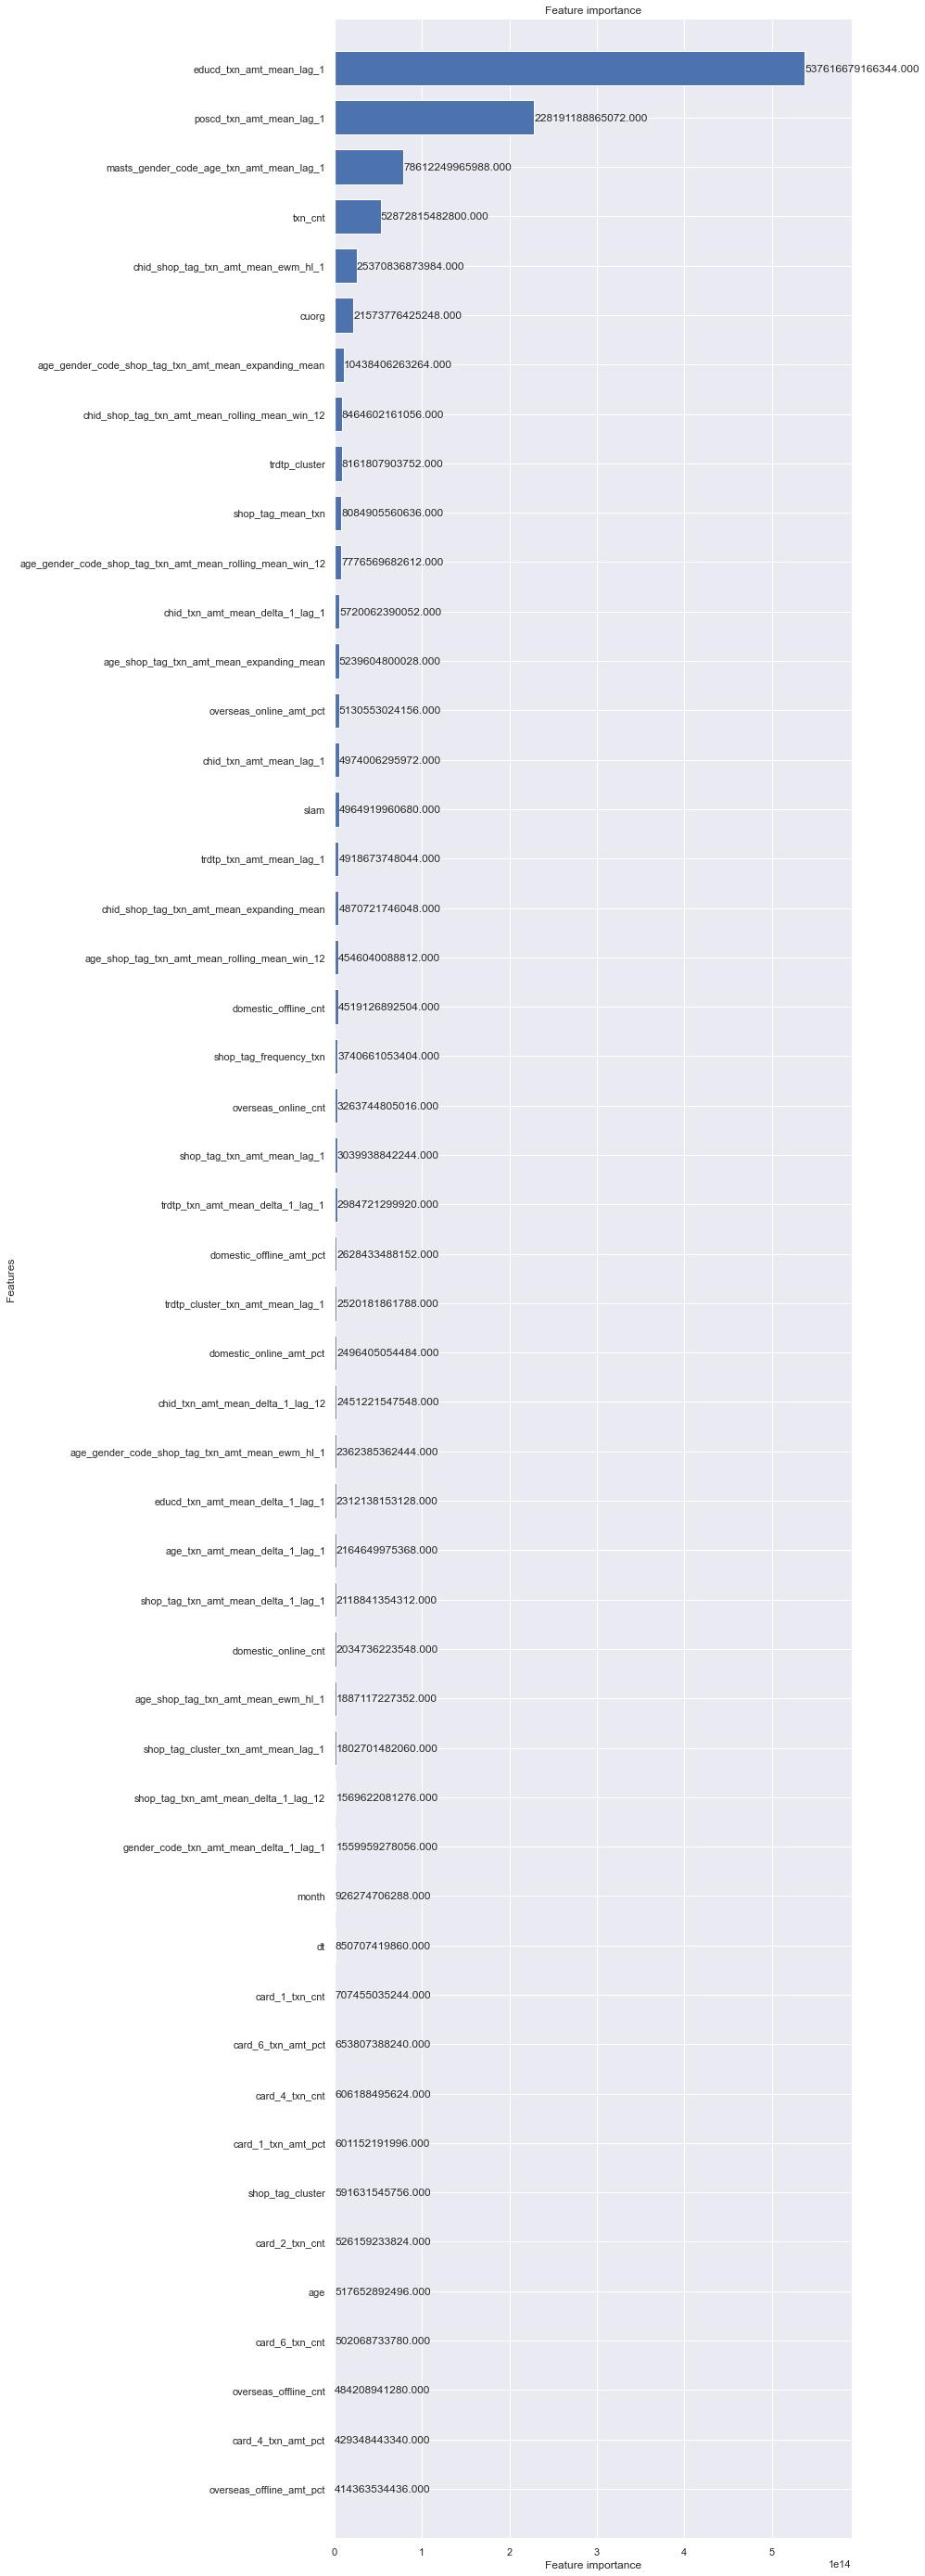

In [17]:
_ = lgbm.plot_importance(lgbooster, figsize=(10,50), height=0.7, importance_type="gain", max_num_features=50)

In [18]:
X_valid

,dt,txn_cnt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,overseas_offline_amt_pct,overseas_online_amt_pct,...,age_gender_code_shop_tag_txn_amt_mean_expanding_mean,age_gender_code_shop_tag_txn_amt_mean_ewm_hl_1,shop_tag_txn_amt_mean_lag_1,shop_tag_cluster_txn_amt_mean_lag_1,trdtp_txn_amt_mean_lag_1,trdtp_cluster_txn_amt_mean_lag_1,chid_txn_amt_mean_lag_1,educd_txn_amt_mean_lag_1,poscd_txn_amt_mean_lag_1,masts_gender_code_age_txn_amt_mean_lag_1
230000,24,0,0,0,0,0,0.00,0.00,0.0,0.0,...,20.609375,29.265625,2205.954834,2315.650146,0.552233,0.72310,0.000000,0.000000,0.000000,0.000000
230001,24,0,0,0,0,0,0.00,0.00,0.0,0.0,...,20.609375,29.265625,2205.954834,2315.650146,0.552233,0.72310,2962.941895,0.000000,0.000000,0.000000
230002,24,0,0,0,0,0,0.00,0.00,0.0,0.0,...,20.609375,29.265625,2205.954834,2315.650146,0.552233,0.72310,2432.405029,0.000000,0.000000,0.000000
230003,24,0,0,0,0,0,0.00,0.00,0.0,0.0,...,20.609375,29.265625,2205.954834,2315.650146,0.552233,0.72310,0.000000,0.000000,0.000000,0.000000
230004,24,1,1,0,0,0,1.00,0.00,0.0,0.0,...,10728.000000,11000.000000,2205.954834,2315.650146,9796.031250,9434.74707,662.547913,9230.841797,9201.879883,8862.301758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839995,24,3,1,2,0,0,0.06,0.94,0.0,0.0,...,9168.000000,9280.000000,1540.938477,1587.549805,9071.677734,9434.74707,610.336060,9230.841797,9307.442383,9462.503906
3839996,24,0,0,0,0,0,0.00,0.00,0.0,0.0,...,14.570312,17.687500,1540.938477,1587.549805,0.552233,0.72310,0.000000,0.000000,0.000000,0.000000
3839997,24,1,1,0,0,0,1.00,0.00,0.0,0.0,...,8456.000000,8400.000000,1540.938477,1587.549805,9796.031250,9434.74707,3812.308594,9718.439453,9307.442383,9962.292969
3839998,24,0,0,0,0,0,0.00,0.00,0.0,0.0,...,14.570312,17.687500,1540.938477,1587.549805,0.552233,0.72310,1849.505371,0.000000,0.000000,0.000000


In [21]:
lgbooster.predict(X_valid)[:10]

array([  44.15956484,  -38.85274019,  -47.2121327 ,   12.37750946,
       8252.41481893,   99.82530811,   44.15956484, 9250.8971049 ,
         44.15956484,  -22.20047627])

In [22]:
y_valid[:10]

230000       0.000000
230001       0.000000
230002       0.000000
230003       0.000000
230004    7576.628906
230005       0.000000
230006       0.000000
230007    8752.539062
230008       0.000000
230009       0.000000
Name: txn_amt, dtype: float32

In [37]:
data.test_data

,chid,top1,top2,top3
0,10128239,18,10,6
1,10077943,48,22,6
2,10277876,22,10,39
3,10364842,37,19,13
4,10392717,2,36,26
...,...,...,...,...
9995,10203858,25,22,37
9996,10008113,22,48,15
9997,10053154,37,39,12
9998,10252782,26,18,12


In [4]:
matrix = data.matrix

In [23]:
df_pred = matrix.query('dt == 24')[['dt', 'chid', 'shop_tag']].reset_index(drop=True)
pred = matrix.query('dt == 24')[['txn_amt']].reset_index(drop=True)


In [24]:
df_pred['pred'] = pred


In [56]:
class OutputPrediction:
  def __init__(self, df_pred):
    self.df_pred = df_pred
  
  def _get_top3(self):
    df_result = self.df_pred.sort_values(by=['chid', 'pred'], ascending=[True, False]).groupby(
        ['chid']).head(3)[['chid', 'shop_tag']].reset_index(drop=True)
    df_result['rank'] = ['top1', 'top2', 'top3'] * 10000
    df_result = pd.pivot_table(df_result, values='shop_tag', index=[
        'chid'], columns=['rank']).reset_index()
    self._df_result = df_result
  
  def execute(self):
    self._get_top3()

  @property
  def df_result(self):
        return self._df_result 
    


In [57]:
op = OutputPrediction(df_pred=df_pred)
op.execute()

In [58]:
op.df_result

rank,chid,top1,top2,top3
0,10000148,37,2,6
1,10000172,19,2,15
2,10000226,2,6,10
3,10000229,12,10,15
4,10000285,2,6,10
...,...,...,...,...
9995,10499761,2,6,10
9996,10499824,2,15,6
9997,10499915,21,15,10
9998,10499968,2,6,10


In [25]:
df_test = df_pred.copy()

In [26]:
df_pred

,dt,chid,shop_tag,pred
0,24,10128239,2,0.0
1,24,10128239,6,0.0
2,24,10128239,10,0.0
3,24,10128239,12,0.0
4,24,10128239,13,0.0
...,...,...,...,...
159995,24,10361566,26,0.0
159996,24,10361566,36,0.0
159997,24,10361566,37,0.0
159998,24,10361566,39,0.0


In [32]:
df_result = df_pred.sort_values(by=['chid', 'pred'], ascending=[True, False]).groupby(['chid']).head(3)[['chid', 'shop_tag']].reset_index(drop=True)

In [39]:
df_result['rank'] = ['top1', 'top2', 'top3'] * 10000


In [34]:
import pandas as pd

In [47]:
df_result = pd.pivot_table(df_result, values='shop_tag', index=[
                        'chid'], columns=['rank']).reset_index()


In [51]:
df_result.columns

Index(['chid', 'top1', 'top2', 'top3'], dtype='object', name='rank')